In [6]:
# Importa as blibliotecas necessárias 
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Importa o conjunto de dados e analisa a base
import pandas as pd  
url = "C:/Users/fabia/OneDrive/Área de Trabalho/IA/data.csv"
dataset = pd.read_csv(url, delimiter=',') # Armazena o conteúdo em um objeto DataFrame
# Exibe informações sobre o conjunto de dados
dataset.info() # Exibe informações sobre o conjunto de dados(com o Dtype)

#dataset.head(20) # Exibe informações sobre o conjunto de dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Remoção das colunas 'id' e 'Unnamed: 32'
dataset_filtrado = dataset.drop(['id','Unnamed: 32'],axis=1)
# Exibe as primeiras cinco linhas do conjunto de dados
dataset_filtrado.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Os valores da coluna "diagnosis" são mapeados para valores numéricos
diagnose_encoding = {'B': 0, 'M': 1}
# Nova coluna é criada para armazenar os valores numéricos mapeados
dataset_filtrado['diagnosis_encoded'] = dataset_filtrado['diagnosis'].map(diagnose_encoding)
# Coluna "diagnosis" é removida
dataset_filtrado = dataset_filtrado.drop(['diagnosis'],axis=1)
# Exibe informações atualizadas sobre o DataFrame 
dataset_filtrado.info()

#dataset_filtrado.head(20) # Mostrar a nova coluna(diagnosis_encoded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [10]:
# Separar as características (x) e os rótulos (y)
y = dataset_filtrado['diagnosis_encoded'] # A coluna "diagnosis_encoded" é atribuída à variável Y
x = dataset_filtrado.drop(['diagnosis_encoded'], axis=1) # As demais colunas são atribuídas à variável X

In [ ]:
# Escalona as características usando StandardScaler
escalonador = StandardScaler()
x = escalonador.fit_transform(x)

In [ ]:
# Normalizar as características usando MinMaxScaler
normalizador = MinMaxScaler()
x = normalizador.fit_transform(x)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       112
           1       0.96      0.76      0.85        59

    accuracy                           0.91       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.91      0.90       171

O acerto foi de:  0.9064327485380117


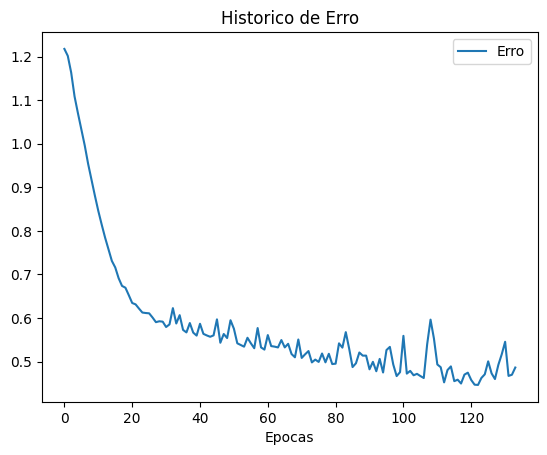

In [11]:
# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

# Inicialização - Minha rede tera 4 entradas, 1º camada 10 neuronios, 2º camada 5 neuronios, saida com 3 neurios
Model = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=2000, alpha=0.4, solver='sgd', verbose=0,  random_state=121) # verbode=0 retira o log

# Treinar o modelo
h = Model.fit(x_train,y_train)

# Fazer previsões nos dados de teste
y_pred=Model.predict(x_test)

# Imprimir relatório de classificação e acurácia
print(classification_report(y_test,y_pred)) # Print 
print('O acerto foi de: ',accuracy_score(y_pred,y_test)) # Print accuracy score

# Plota o histórico de erro durante o treinamento
plt.plot(h.loss_curve_)
plt.title('Historico de Erro')
plt.xlabel('Epocas')
plt.legend(['Erro'])

# 'B': 0 e 'M': 1


C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

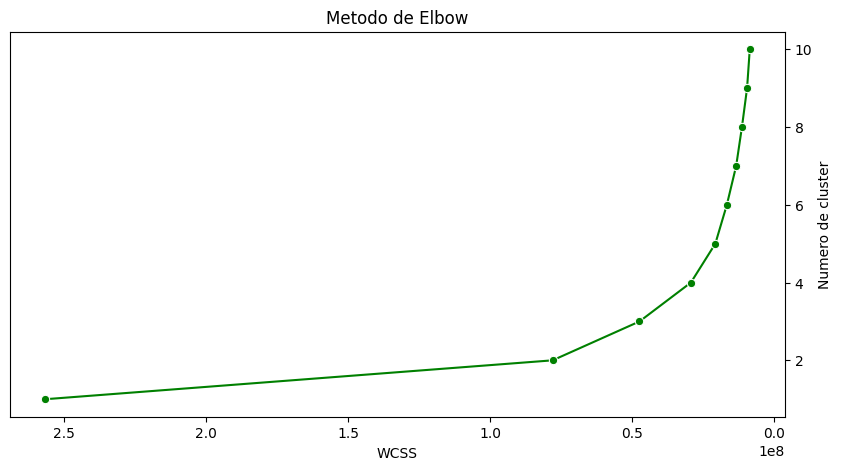

In [12]:
# Função para determinar o número ideal de clusters usando o método Elbow
def elbow(x):
  from sklearn.cluster import KMeans
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
  return wcss
elbow(x)

# Chamar a função elbow() para calcular o método Elbow
wcss = elbow(x)

# Calcular o método Elbow e plotar o gráfico
plt.figure(figsize=(10, 5))
sb.lineplot(x=wcss, y=range(1,11), marker='o', color='green')
plt.title('Metodo de Elbow')
plt.ylabel('Numero de cluster')
plt.xlabel('WCSS')
plt.gca().invert_xaxis()
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()

In [13]:
# Aplicar a análise de componentes principais (PCA) para reduzir a dimensionalidade
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dados_pca = pca.fit_transform(x)

# Imprimir a variância explicada de cada componente principal
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# Aplicar o método Elbow nos dados reduzidos do PCA
print(elbow(dados_pca))

# Executar o algoritmo K-Means para agrupar os dados em 3 clusters
kmeans = KMeans(n_clusters=2,init="k-means++",random_state=0,max_iter = 500) #3 clusters
kmeans2 = kmeans.fit(dados_pca)

# Obter os centroides dos clusters e as etiquetas de agrupamento
centroides = kmeans2.cluster_centers_
agrupamento = kmeans2.labels_

# Plotar o gráfico de dispersão dos dados reduzidos do PCA com cores representando os clusters
import plotly.express as px
import plotly.graph_objects as go

graf1 = px.scatter(x=dados_pca[:,0], y=dados_pca[:,1], color=y)
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size = [15,15]) #size é o numero de cluster
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')

graf3.show()

[0.98204467 0.01617649]
0.9982211613741718


C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

[256220656.55828544, 77487123.4034044, 46862447.24107581, 28823916.135840155, 20195587.14339104, 16172456.492829679, 12895979.222431583, 10924035.939046063, 9124613.795934897, 8172790.545738737]


C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
